# Importing Libraraies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from collections import defaultdict

# Reading the dataset

In [35]:
df = pd.read_csv('./indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


# EDA

In [3]:
df.describe()

,prep_time,cook_time
count,270.000000,270.000000
mean,30.988889,34.796296
std,70.762311,46.990539
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


### Findind out the null values and replacing them with actual value

In [4]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [5]:
df.loc[df['region'].isna(),'region'] = 'North'

In [6]:
df.loc[df['state']== '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North


# Data Engineering

Here, we are filtering out the state and the ingredients of their corresponding food

In [7]:
x = df.groupby('state')['ingredients'].apply(list).reset_index(name='ingredients')

In [8]:
# function to get the uniqueue values from each string
def get_unique_ingred(ingred):
    for i in ingred:
        word = i.lower().split(',')
    return set(word)

In [9]:
x['ingredients'] = x['ingredients'].apply(get_unique_ingred)
x

,state,ingredients
0,-1,"{red pepper, olive oil, red onion, butter, ..."
1,Andhra Pradesh,"{green moong beans, rice flour}"
2,Assam,"{ gur, glutinous rice, black sesame seeds}"
3,Bihar,"{sattu, dough, atta, filling, mustard oil}"
4,Chhattisgarh,"{ garam masala powder, arhar dal, white urad..."
5,Goa,"{ ginger powder, brown rice, fennel seeds, b..."
6,Gujarat,"{ peas, ridge gourd, sugar, baking soda, gr..."
7,Haryana,"{ curry leaves, garam masala powder, besan, ..."
8,Himachal Pradesh,"{ cinnamon, lentils, cloves, salt, yogurt,..."
9,Jammu & Kashmir,"{ pistachio, badam, cottage cheese, dry date..."


In [10]:
x.drop(0,inplace=True)

In [11]:
x['ingredients'] = x['ingredients'].apply(' '.join)
x

,state,ingredients
1,Andhra Pradesh,green moong beans rice flour
2,Assam,gur glutinous rice black sesame seeds
3,Bihar,sattu dough atta filling mustard oil
4,Chhattisgarh,garam masala powder arhar dal white urad da...
5,Goa,ginger powder brown rice fennel seeds black...
6,Gujarat,peas ridge gourd sugar baking soda grated ...
7,Haryana,curry leaves garam masala powder besan gram...
8,Himachal Pradesh,cinnamon lentils cloves salt yogurt cumi...
9,Jammu & Kashmir,pistachio badam cottage cheese dry dates d...
10,Jharkhand,jaggery cardamom powder whole wheat flour c...


In [12]:
corpus = x['ingredients'].tolist()
corpus[4][:36]

' ginger powder brown rice  fennel se'

In [14]:
tfidf = TfidfVectorizer()
vec = tfidf.fit_transform(corpus)
final_df = pd.DataFrame(data=vec.toarray(),columns=tfidf.get_feature_names_out())
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
moong,0.585267,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
green,0.474853,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.00000,0.282721,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.283697
beans,0.439308,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.262461
flour,0.345678,0.000000,0.0,0.149386,0.000000,0.0,0.253189,0.000000,0.0,0.258388,...,0.00000,0.205812,0.218455,0.0,0.0,0.0,0.0,0.195354,0.0,0.000000
rice,0.345678,0.306994,0.0,0.000000,0.240347,0.0,0.000000,0.217426,0.0,0.000000,...,0.26067,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


# K-Means

Calculating the silhouette scores of different cluster to find out the optimal number of cluster

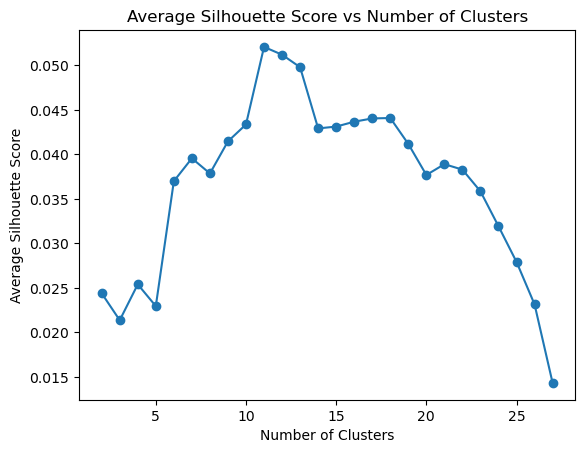

In [16]:

max_clusters = 27
silhouette_scores = []

for n_clusters in range(2, max_clusters + 1):
    # Fit K-means to the TF-IDF matrix
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(final_df)

    # Calculate the silhouette score
    silhouette = silhouette_score(final_df, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Plot the silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score vs Number of Clusters')
plt.show()


12 gives us the best silhoutte score

In [17]:
no_cluster = 12

kmeans = KMeans(n_clusters=no_cluster,init='k-means++', random_state=36)
y_pred = kmeans.fit_predict(vec)

In [18]:
x['cluster'] = y_pred
x

,state,ingredients,cluster
1,Andhra Pradesh,green moong beans rice flour,2
2,Assam,gur glutinous rice black sesame seeds,10
3,Bihar,sattu dough atta filling mustard oil,9
4,Chhattisgarh,garam masala powder arhar dal white urad da...,8
5,Goa,ginger powder brown rice fennel seeds black...,10
6,Gujarat,peas ridge gourd sugar baking soda grated ...,2
7,Haryana,curry leaves garam masala powder besan gram...,0
8,Himachal Pradesh,cinnamon lentils cloves salt yogurt cumi...,8
9,Jammu & Kashmir,pistachio badam cottage cheese dry dates d...,3
10,Jharkhand,jaggery cardamom powder whole wheat flour c...,8


# Plotting

In [19]:
import geopandas as gpd

In [20]:
out_res = pd.concat([x['state'],x['cluster']], axis=1)
out_res.replace('NCT of Delhi','Delhi',inplace=True)

In [21]:
indian_map = gpd.read_file('./India-State-and-Country-Shapefile-Updated-Jan-2020-master/India_State_Boundary.shp')

indian_map.replace('Jammu and Kashmir','Jammu & Kashmir',inplace=True)
indian_map.replace('Telengana','Telangana',inplace=True)
indian_map.replace('Tamilnadu','Tamil Nadu',inplace=True)
indian_map.replace('Chhattishgarh','Chhattisgarh',inplace=True)

In [22]:
merged = indian_map.set_index('State_Name').join(out_res.set_index('state'))

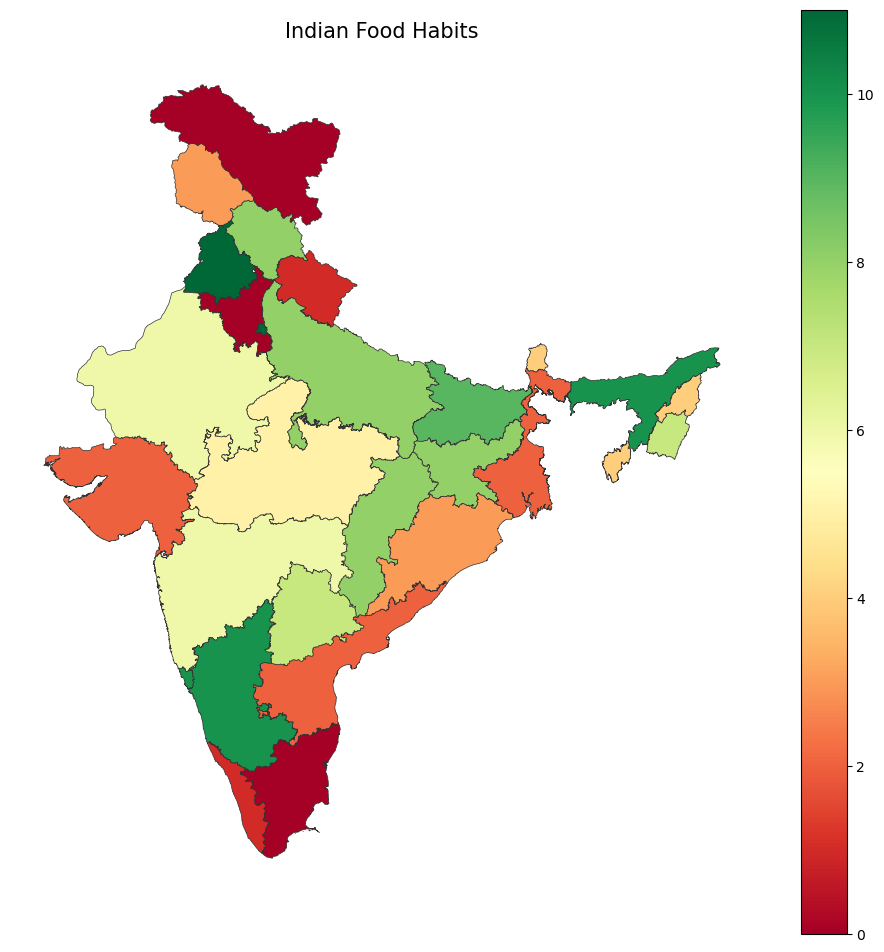

In [23]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Indian Food Habits',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='cluster', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

# Cluster Analysis

In [33]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    cluster_word_count = defaultdict(dict)
    
    # interate over each cluster
    for cluster_label in  range(no_cluster):
        cluster_df = x[x['cluster'] == cluster_label]
        cluster_text = ' '.join(cluster_df['ingredients'])
        words = cluster_text.split()
        
        word_count = defaultdict(int)
        for word in words:
            word_count[word] += 1
        
        cluster_word_count[cluster_label] = word_count
        
#         return cluster_word_count
        top_cluster_words = defaultdict(dict)
        
        for cluster_label, word_count in  cluster_word_count.items():
            top_cluster_words[cluster_label] = dict(sorted(word_count.items(), key=lambda item: item[1],reverse=True))

        
    return top_cluster_words
        
def plotWords(dfs, n_feats):
    for i in range(no_cluster):
        plt.title((f'Top {n_feats} ingredients in cluster {i}'), fontsize=10, fontweight='bold')
        key = list(dfs[i].keys())
        value = list(dfs[i].values())
        sns.barplot(x=value[:n_feats], y=key[:n_feats],orient='h')
        plt.title(f'{n_feats} most common ingredients in cluster {i}')
        plt.show()

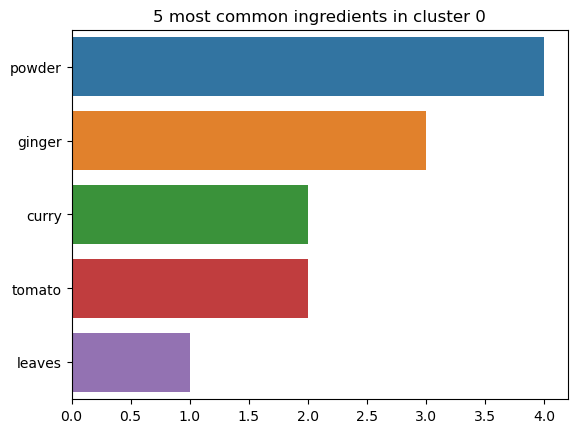

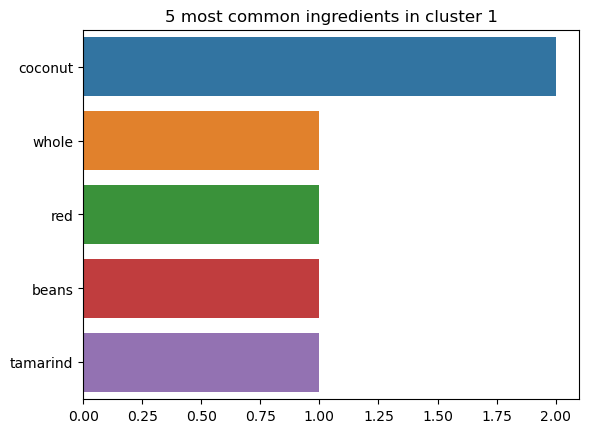

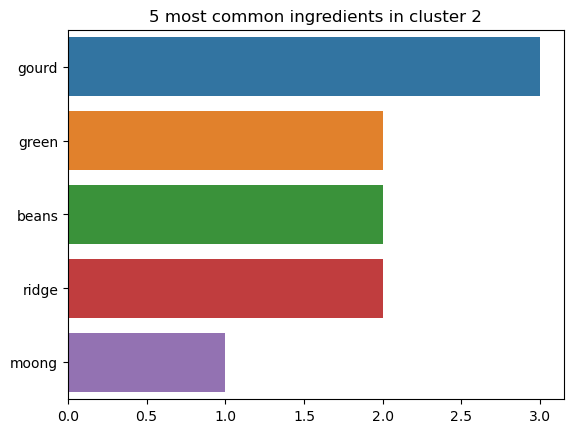

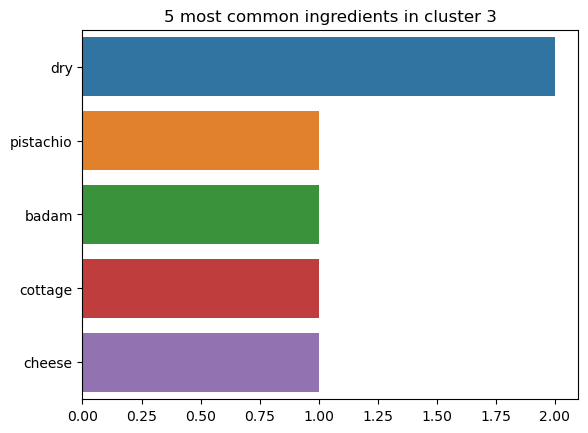

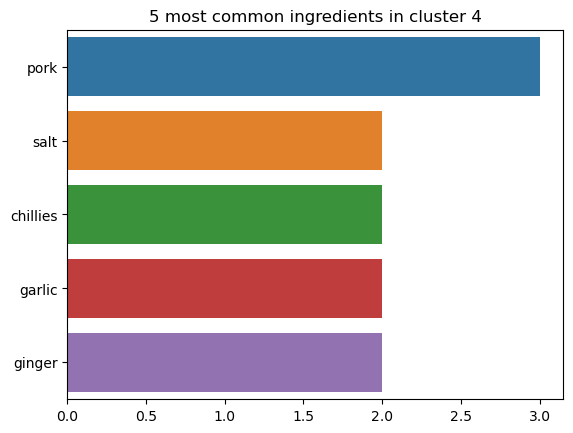

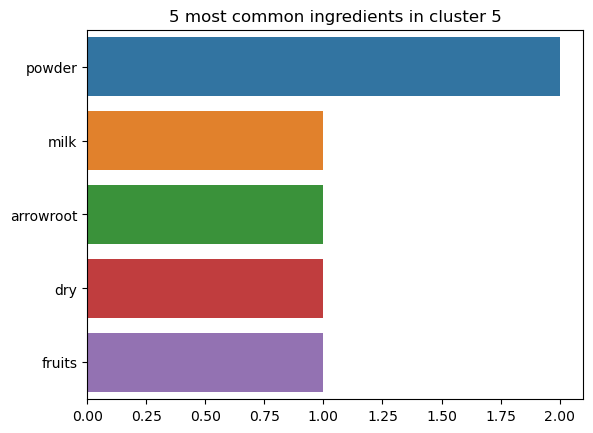

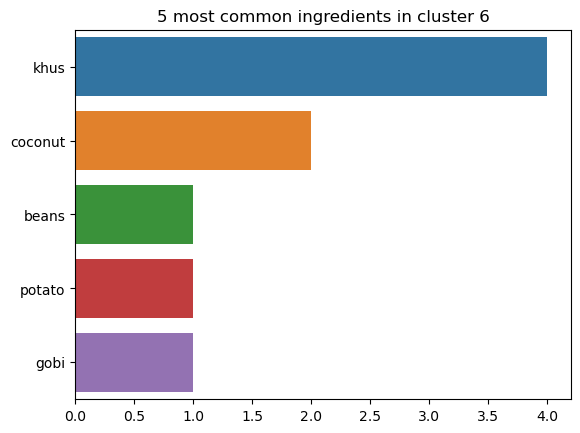

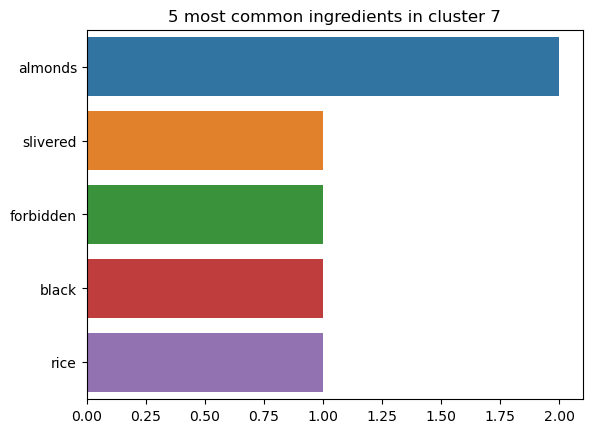

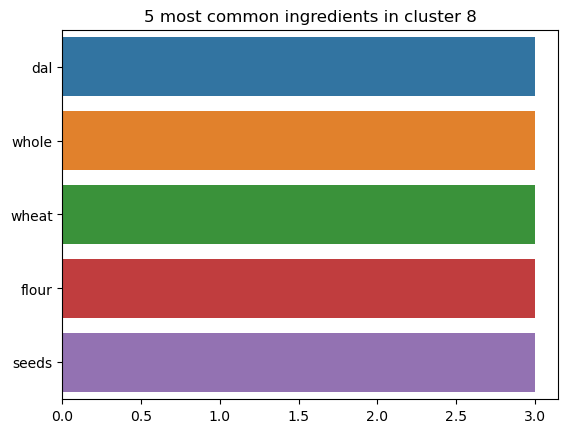

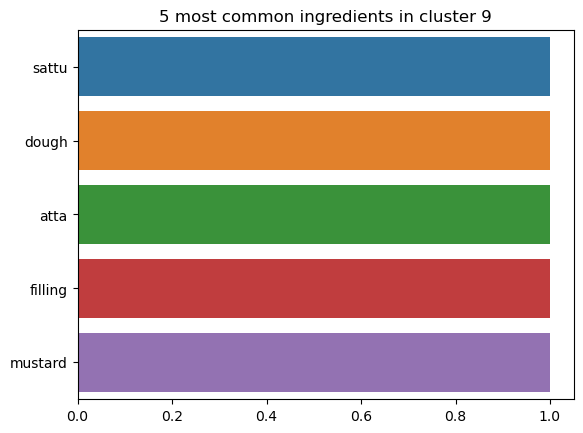

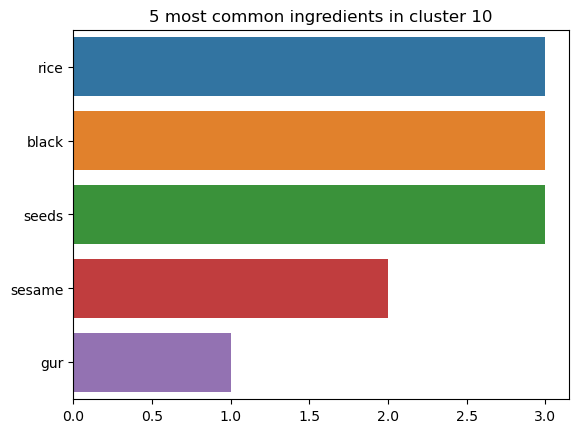

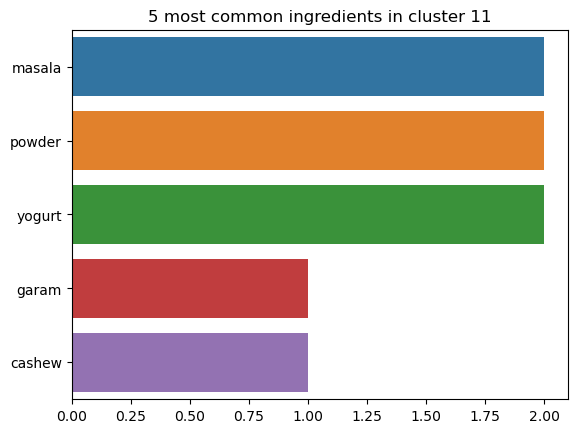

In [34]:

final_df_array = final_df.to_numpy()
n_feats = 5
dfs = get_top_features_cluster(final_df_array, y_pred, n_feats)
plotWords(dfs,n_feats=n_feats)